In [14]:
stock_ = 'NIFTY BANK'
index = True

In [2]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

<h3> Train Non Corona Model </h3>

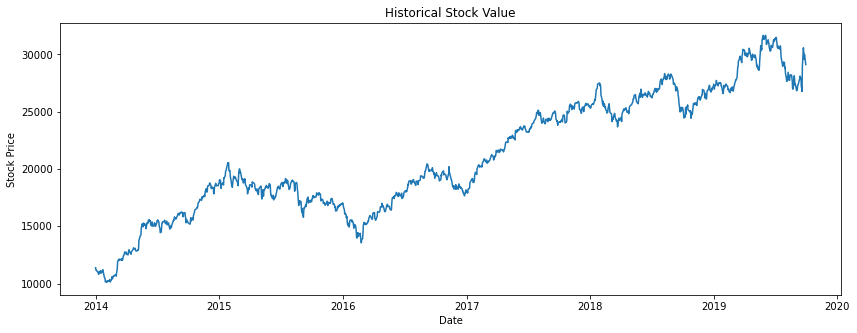

Epoch 1/15
34/34 [==============================] - 6s 170ms/step - loss: 0.0304 - val_loss: 0.0063
Epoch 2/15
34/34 [==============================] - 4s 108ms/step - loss: 0.0045 - val_loss: 0.0034
Epoch 3/15
34/34 [==============================] - 4s 106ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 4/15
34/34 [==============================] - 4s 108ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 5/15
34/34 [==============================] - 4s 125ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/15
34/34 [==============================] - 4s 123ms/step - loss: 0.0032 - val_loss: 0.0036
Epoch 7/15
34/34 [==============================] - 4s 124ms/step - loss: 0.0029 - val_loss: 0.0032
Epoch 8/15
34/34 [==============================] - 4s 107ms/step - loss: 0.0034 - val_loss: 0.0039
Epoch 9/15
34/34 [==============================] - 4s 103ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 10/15
34/34 [==============================] - 4s 113ms/step - loss: 0.0028 - val_loss: 0.0027

In [15]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2019,9,30)
stk_data = gh(symbol=stock_,start=start,end=end, index=index)
plt.figure(figsize=(14,5))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1417):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32, validation_split=0.2)

<br>
<h2> Loading Saved Model </h2>

In [4]:
#try:
#    regressor = keras.models.load_model('saved_models/{}_pre'.format(stock_))
#except:
#    print('No saved model found, try after saving a model')

<br>
<h2> Testing Validity of Non Corona Training </h2>

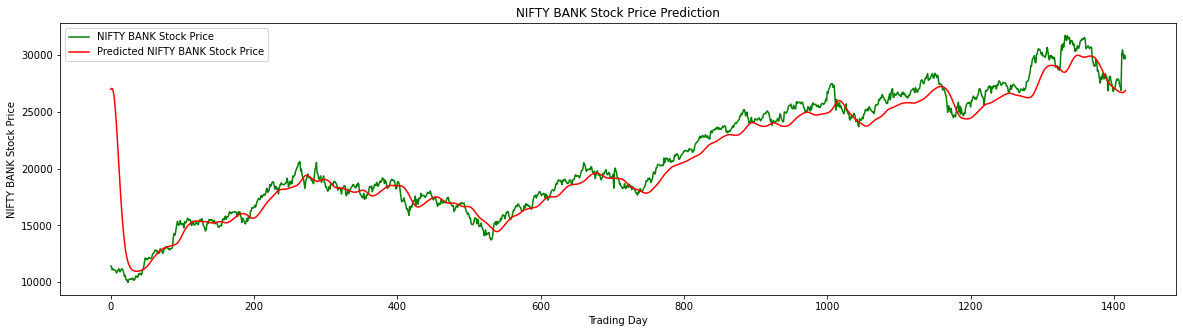

In [16]:
testdataframe= gh(symbol=stock_,start=dt.datetime(2014,1,1),end=dt.datetime(2019,9,30), index=index)
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 1477):  
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.figure(figsize=(20,5))
plt.plot(real_stock_price, color = 'green', label = '{} Stock Price'.format(stock_))
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted {} Stock Price'.format(stock_))
plt.title('{} Stock Price Prediction'.format(stock_))
plt.xlabel('Trading Day')
plt.ylabel('{} Stock Price'.format(stock_))
plt.legend()
plt.show()

<br>
<h2> Non Corona Trained in Corona Stage </h2>

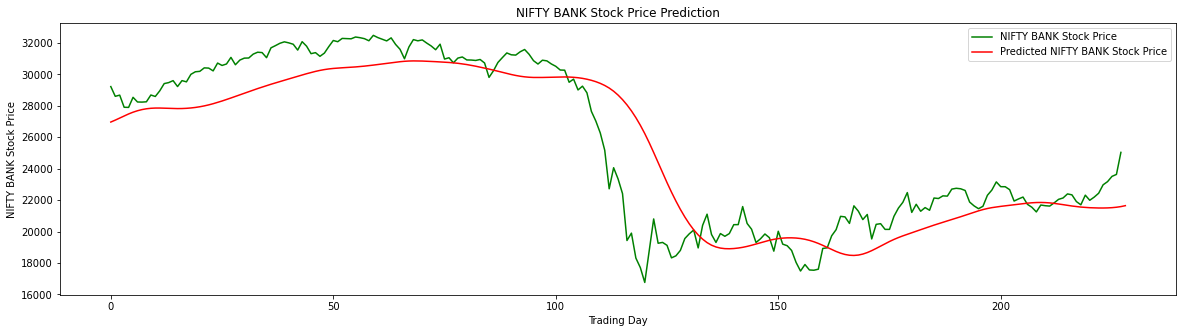

In [17]:
testdataframe= gh(symbol=stock_,start=dt.datetime(2019,10,1),end=dt.datetime(2020,8,31), index=index)
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 289): 
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.figure(figsize=(20,5))
plt.plot(real_stock_price, color = 'green', label = '{} Stock Price'.format(stock_))
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted {} Stock Price'.format(stock_))
plt.title('{} Stock Price Prediction'.format(stock_))
plt.xlabel('Trading Day')
plt.ylabel('{} Stock Price'.format(stock_))
plt.legend()
plt.show()

<h2> Train Corona Model </h2>

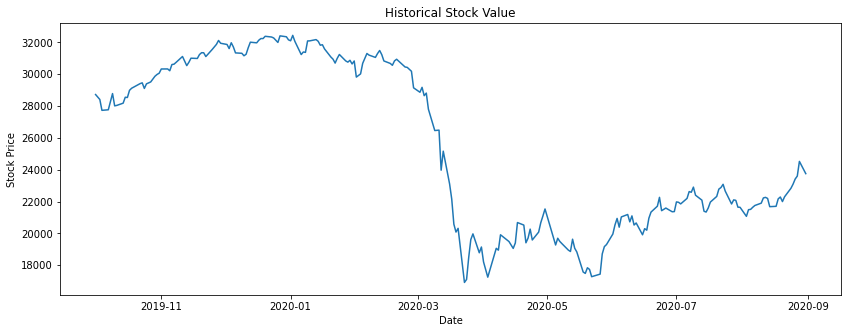

IndexError: index 228 is out of bounds for axis 0 with size 228

In [23]:
start2 = dt.datetime(2019,10,1)
end2 = dt.datetime(2020,8,31)
stk_data2 = gh(symbol=stock_,start=start2,end=end2, index=index)
plt.figure(figsize=(14,5))
plt.plot(stk_data2['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()
stk_data2['Date'] = stk_data2.index
data3 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data3['Date'] = stk_data2['Date']
data3['Open'] = stk_data2['Open']
data3['High'] = stk_data2['High']
data3['Low'] = stk_data2['Low']
data3['Close'] = stk_data2['Close']
train_set2 = data3.iloc[:, 1:2].values
sc2 = MinMaxScaler(feature_range = (0, 1))
training_set_scaled2 = sc2.fit_transform(train_set2)
X_train2 = []
y_train2 = []
for i in range(60, 289):
    X_train2.append(training_set_scaled2[i-60:i, 0])
    y_train2.append(training_set_scaled2[i, 0]) 
X_train2, y_train2 = np.array(X_train), np.array(y_train)
X_train2 = np.reshape(X_train2, (X_train2.shape[0], X_train2.shape[1], 1))
regressor2 = Sequential()
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train2.shape[1], 1)))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))
regressor2.add(Dense(units = 1))
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor2.fit(X_train2, y_train2, epochs = 15, batch_size = 32, validation_split=0.2)

<h2> Corona Trained in Corona stage </h2>

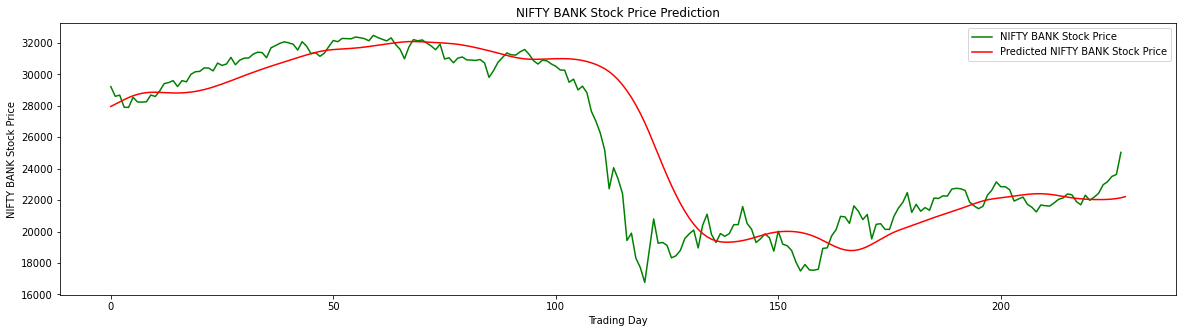

In [21]:
testdataframe= gh(symbol=stock_,start=dt.datetime(2019,10,1),end=dt.datetime(2020,8,31), index=index)
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc2.transform(inputs)
X_test = []
for i in range(60, 289): 
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor2.predict(X_test)
predicted_stock_price = sc2.inverse_transform(predicted_stock_price)
plt.figure(figsize=(20,5))
plt.plot(real_stock_price, color = 'green', label = '{} Stock Price'.format(stock_))
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted {} Stock Price'.format(stock_))
plt.title('{} Stock Price Prediction'.format(stock_))
plt.xlabel('Trading Day')
plt.ylabel('{} Stock Price'.format(stock_))
plt.legend()
plt.show()

<br>
<h2> Saving The Model </h2>

In [ ]:
#regressor.save('saved_models/{}_pre'.format(stock_))